### References
- https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
- https://www.sbert.net/docs/usage/semantic_textual_similarity.html
- https://towardsdatascience.com/how-to-cluster-similar-sentences-using-tf-idf-and-graph-partitioning-in-python-5fb70627a4e0

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

# Single list of sentences
sentences = ['HDMI is flickering',
             'Books not available',
             'Internet slow',
             'Water leaking',
             'HDMI monitor not working',
             'College needs to make books available in the library',
             'Floor is wet',
             'i almost slipped because floor is very wet']

#Compute embeddings
embeddings = model.encode(sentences, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)
print("=====")
print(cosine_scores)
print("=====")

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in pairs[0:10]:
    i, j = pair['index']
    print("{} --- {} --- Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))

/Users/akashadhikari/miniconda3/envs/datascience/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=====
tensor([[ 1.0000,  0.0327,  0.2399,  0.2270,  0.6098,  0.0272,  0.0214,  0.0788],
        [ 0.0327,  1.0000,  0.1269,  0.1244,  0.1311,  0.6025,  0.0734,  0.0977],
        [ 0.2399,  0.1269,  1.0000,  0.1702,  0.0610,  0.0494,  0.0884,  0.0704],
        [ 0.2270,  0.1244,  0.1702,  1.0000,  0.0957,  0.0174,  0.4033,  0.3272],
        [ 0.6098,  0.1311,  0.0610,  0.0957,  1.0000,  0.0369,  0.0134,  0.0188],
        [ 0.0272,  0.6025,  0.0494,  0.0174,  0.0369,  1.0000, -0.0584, -0.0379],
        [ 0.0214,  0.0734,  0.0884,  0.4033,  0.0134, -0.0584,  1.0000,  0.6779],
        [ 0.0788,  0.0977,  0.0704,  0.3272,  0.0188, -0.0379,  0.6779,  1.0000]])
=====
Floor is wet --- i almost slipped because floor is very wet --- Score: 0.6779
HDMI is flickering --- HDMI monitor not working --- Score: 0.6098
Books not available --- College needs to make books available in the library --- Score: 0.6025
Water leaking --- Floor is wet --- Score: 0.4033
Water leaking --- i almost slipped because 

### Sentences, cosine scores and visualizing the relationships

In [2]:
sentences

['HDMI is flickering',
 'Books not available',
 'Internet slow',
 'Water leaking',
 'HDMI monitor not working',
 'College needs to make books available in the library',
 'Floor is wet',
 'i almost slipped because floor is very wet']

In [3]:
cosine_scores

tensor([[ 1.0000,  0.0327,  0.2399,  0.2270,  0.6098,  0.0272,  0.0214,  0.0788],
        [ 0.0327,  1.0000,  0.1269,  0.1244,  0.1311,  0.6025,  0.0734,  0.0977],
        [ 0.2399,  0.1269,  1.0000,  0.1702,  0.0610,  0.0494,  0.0884,  0.0704],
        [ 0.2270,  0.1244,  0.1702,  1.0000,  0.0957,  0.0174,  0.4033,  0.3272],
        [ 0.6098,  0.1311,  0.0610,  0.0957,  1.0000,  0.0369,  0.0134,  0.0188],
        [ 0.0272,  0.6025,  0.0494,  0.0174,  0.0369,  1.0000, -0.0584, -0.0379],
        [ 0.0214,  0.0734,  0.0884,  0.4033,  0.0134, -0.0584,  1.0000,  0.6779],
        [ 0.0788,  0.0977,  0.0704,  0.3272,  0.0188, -0.0379,  0.6779,  1.0000]])

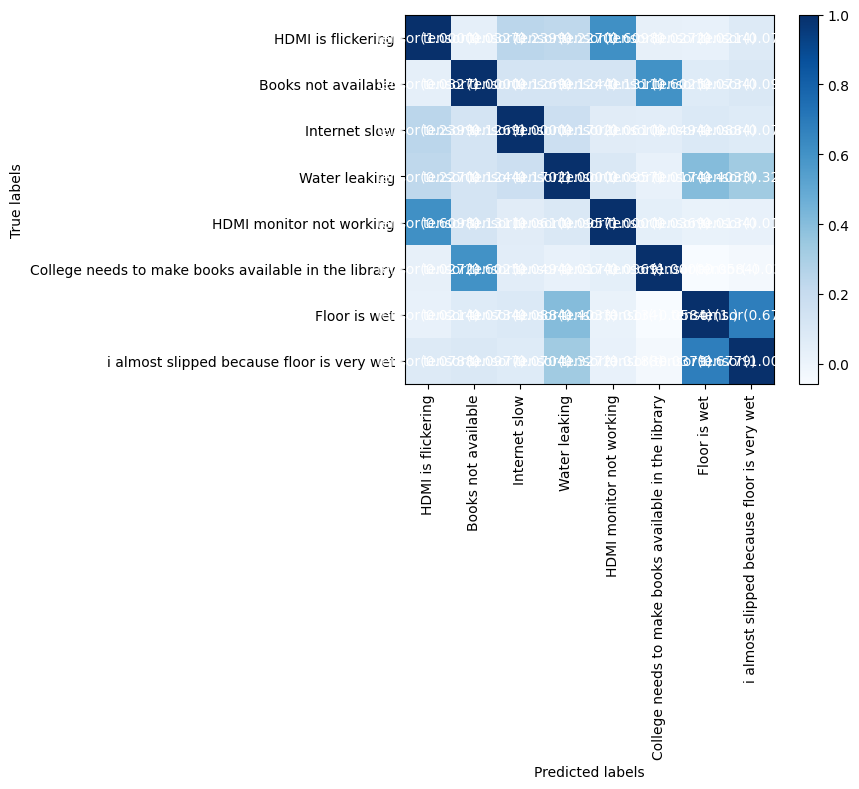

In [6]:
plt.imshow(cosine_scores, cmap='Blues')

# Add colorbar and axis labels
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0,1,2,3,4,5,6,7], sentences, rotation=90)
plt.yticks([0,1,2,3,4,5,6,7], sentences)

# Add values inside the heatmap
for i in range(cosine_scores.shape[0]):
    for j in range(cosine_scores.shape[1]):
        plt.text(j, i, str(cosine_scores[i,j]), ha='center', va='center', color='white')

# Show the plot
plt.show()